# Data Ingestion

In [83]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip


--2025-09-29 16:05:42--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 3.5.211.55, 3.5.208.55, 3.5.212.238, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|3.5.211.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip.2’

data.zip.2          100%[===================>]  27.12M  13.5MB/s    in 2.0s    

2025-09-29 16:05:45 (13.5 MB/s) - ‘data.zip.2’ saved [28437489/28437489]



# Feature Engineering



In [84]:
import os
import cv2
import random

In [118]:
def extract_images(dir):
  images=[]
  labels=[]

  for folder in os.listdir(dir):
    path=os.path.join(dir,folder)
    for image in os.listdir(path):
      img=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img,(32,32))
      images.append(img)
      labels.append(folder)
  data=list(zip(images,labels))
  random.shuffle(data)

  #final verdict
  images,labels=zip(*data)

  return (images,labels)







In [119]:
import numpy as np

In [120]:
def extract_images_np(dir):
  images=[]
  labels=[]

  for folder in os.listdir(dir):
    path=os.path.join(dir,folder)
    for image in os.listdir(path):
      img=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img,(32,32))
      img=img.flatten()
      images.append(img)
      labels.append(folder)
  data=list(zip(images,labels))
  random.shuffle(data)

  #final verdict
  images,labels=zip(*data)

  return np.array(images),np.array(labels)



In [121]:
data_dir="/content/data/dataset"

In [122]:
images,labels=extract_images_np(data_dir)

In [123]:
print(type(images))

<class 'numpy.ndarray'>


In [124]:
import pandas as pd

In [125]:
images=np.array(images)
images=images/255.0
df_X=pd.DataFrame(images)
df_X['label']=labels
df_X.to_csv('data.csv',index=False)

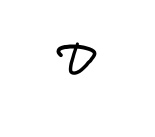

In [126]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/data/dataset/0/12643.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)


In [127]:
df=pd.read_csv('data.csv')

In [128]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mul
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6


In [129]:
len(images)


7600

In [130]:
images_nnp,labels_nnp=extract_images(data_dir)

In [131]:
list(set(labels_nnp))

['3', '4', '2', '6', '5', '9', '0', '7', 'mul', 'sub', 'div', '8', '1', 'add']

In [132]:
import matplotlib.pyplot as plt

In [133]:
def get_random_images_from_all():
  folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
  images = []

  for folder in folders:
      folder_path = '/content/data/dataset/' + folder
      image_files = os.listdir(folder_path)
      if image_files:
          random_image_file = random.choice(image_files)
          image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
          image = cv2.resize(image, (32, 32))
          images.append(image)

  images = np.array(images)
  images = images / 255.0
  images = np.expand_dims(images, axis=-1)
  return images



In [134]:
imagess=get_random_images_from_all()

In [135]:
len(imagess)

14

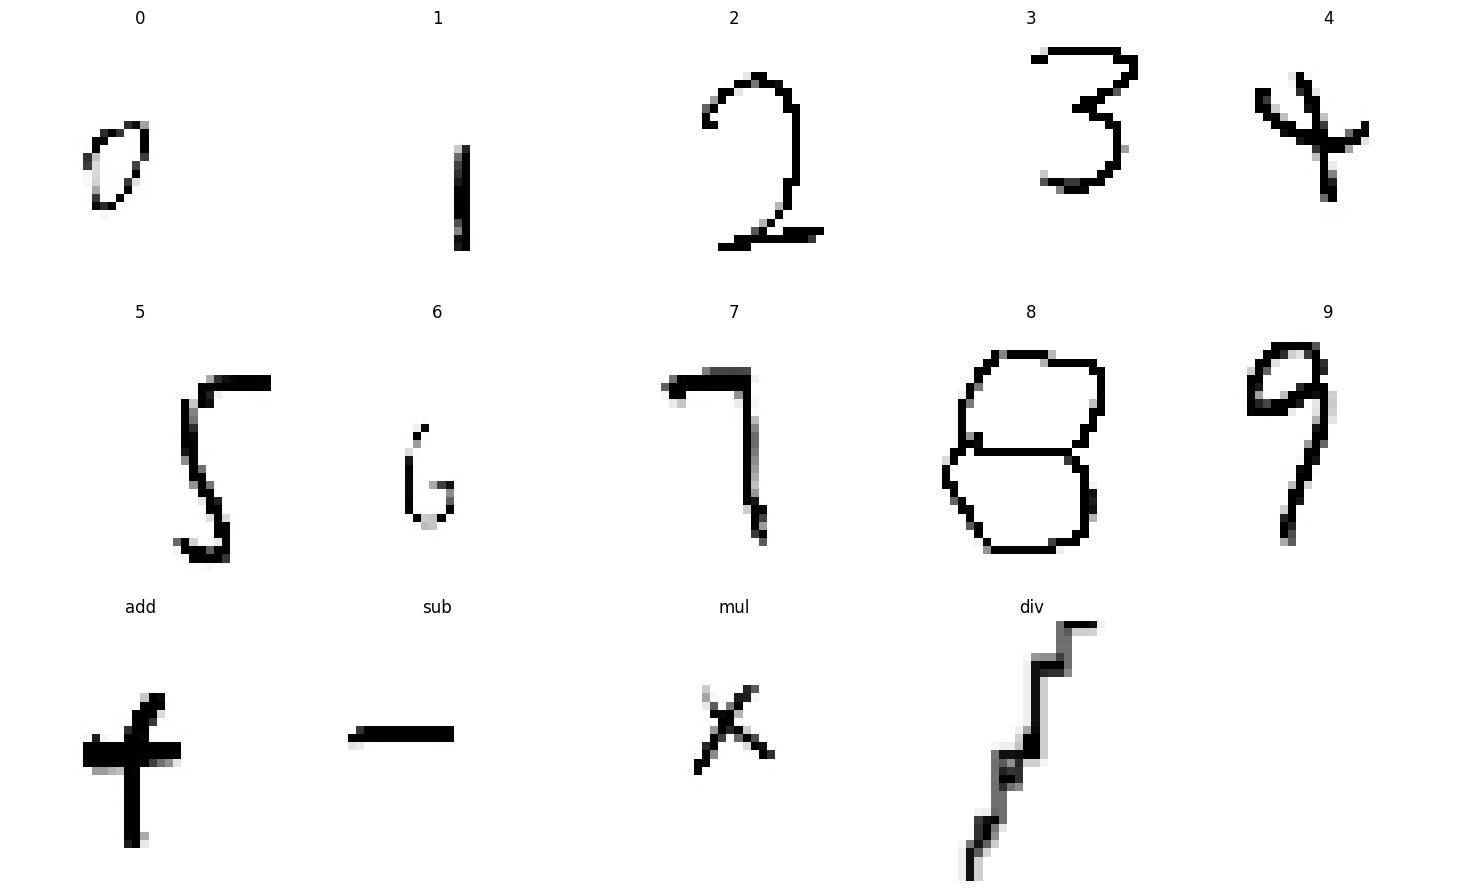

In [136]:

folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)


fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [137]:
def display_image(image,label):
  plt.imshow(image,cmap='gray')
  plt.title(label)
  plt.axis('off')
  plt.show()

8


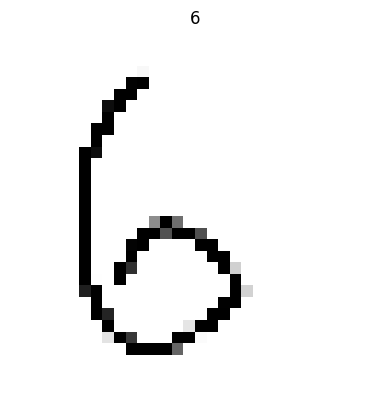

In [140]:
x=int(input())
display_image(images_nnp[x],labels_nnp[x])